Feature scaling refers to the process of transforming the values of numerical features (variables) so that they fall within a certain range or have a particular statistical property, such as a mean of 0 and a standard deviation of 1. The goal is to make the features comparable, especially when they have different units or scales, and to improve the performance of certain machine learning algorithms.

Main reasons to consider Feature Scaling:

1. **Improves Model Convergence**. Some machine learning algorithms, particularly those that use gradient-based optimization (e.g., logistic regression, neural networks, support vector machines), are sensitive to the scale of the data. Large values can dominate over smaller values, slowing down the optimization process. Scaling helps models converge faster by preventing any single feature from disproportionately influencing the training process.

2. **Equal Weighting of Features**. In many algorithms (e.g., k-nearest neighbors (k-NN), support vector machines (SVM), k-means clustering), features with larger numeric ranges will dominate the distance metric, leading to biased results. Scaling ensures that all features contribute equally to the model.

3. **Improves Model Accuracy**. For algorithms like PCA (Principal Component Analysis), which rely on distance and covariance calculations, feature scaling ensures that the model doesn't give more importance to high-magnitude features (like "income" in thousands vs. "age" in years). This can improve accuracy and interpretability.

Common Feature Scaling Techniques:
- Min-Max Scaling (Normalization)
- Standardization (Z-score Normalization)
- Robust Scaling
- Log Transformation

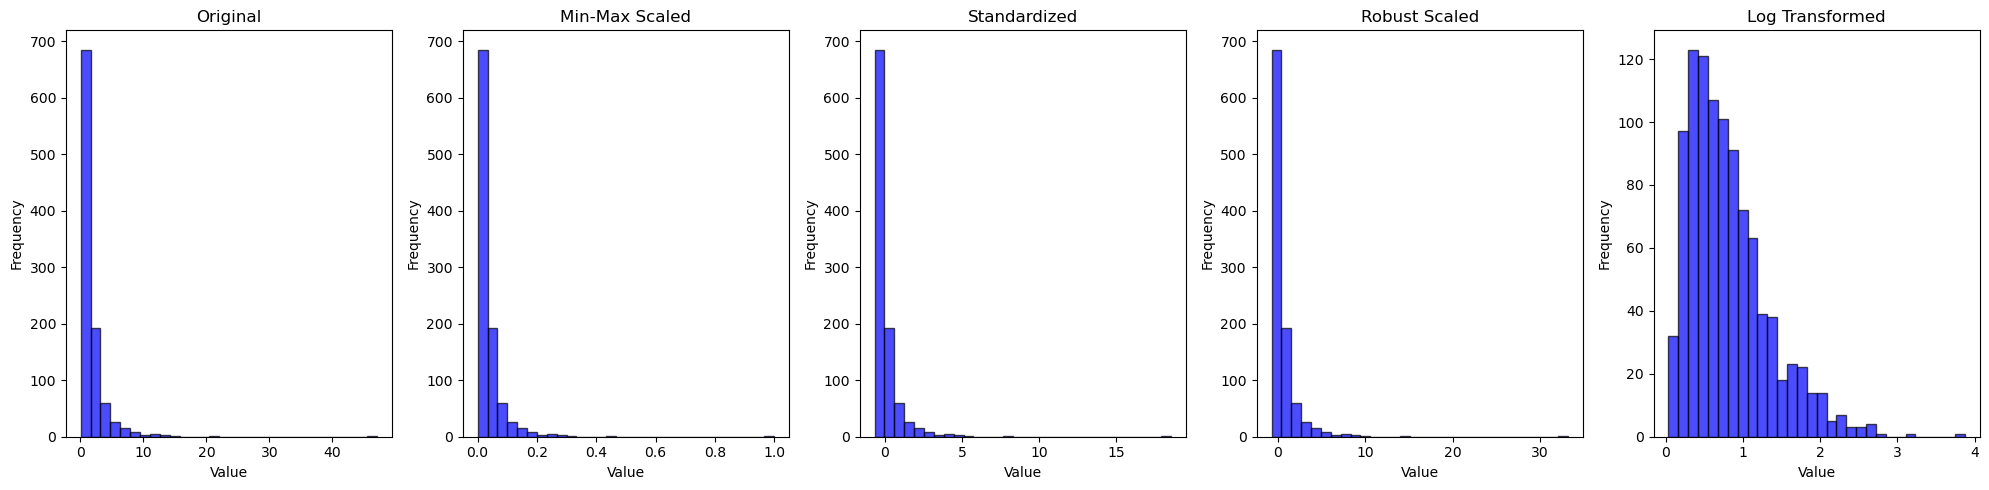

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Generate synthetic data with a skewed distribution
np.random.seed(42)
data = np.random.lognormal(size=1000)  # Right-skewed data

# Convert to DataFrame
df = pd.DataFrame(data, columns=['Original'])

# Apply Scaling Techniques
df['Min-Max Scaled'] = MinMaxScaler().fit_transform(df[['Original']])
df['Standardized'] = StandardScaler().fit_transform(df[['Original']])
df['Robust Scaled'] = RobustScaler().fit_transform(df[['Original']])
df['Log Transformed'] = np.log1p(df['Original'])  # log(1 + x) to avoid log(0)

# Plot Original vs. Scaled Features
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
scaling_methods = ['Original', 'Min-Max Scaled', 'Standardized', 'Robust Scaled', 'Log Transformed']

for i, method in enumerate(scaling_methods):
    axes[i].hist(df[method], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(method)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Best Practices for Feature Scaling

When applying **feature scaling**, consider the following best practices to ensure your machine learning pipeline remains **robust and generalizable**:

| **Best Practice** | **Why?** |
|-------------------|---------|
| **1️⃣ Fit the scaler only on training data** | Avoids **data leakage** |
| **2️⃣ Choose the right scaler based on data distribution** | Ensures appropriate transformations |
| **3️⃣ Apply the same scaler to train & test sets** | Maintains consistency |
| **4️⃣ Always Check the effect of scaling with visualizations** | Detects issues with transformed data |
| **5️⃣ Know when scaling is unnecessary** | Tree-based models don't require scaling |
| **6️⃣ Store and reuse the fitted scaler in production** | Keeps data transformations consistent |

## **1️⃣ Do Not Fit the Scaler on the Entire Dataset**
❌ **Wrong:** Fitting the scaler on the entire dataset before splitting into training and testing.  
✅ **Correct:** Always **fit the scaler only on the training set** and use it to transform both the training and test sets.

```python
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit scaler ONLY on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)
```
🔹 **Why?** Prevents **data leakage**, ensuring the model generalizes well to unseen data.

## **2️⃣ Choose the Right Scaling Method Based on Data Distribution**
- **Min-Max Scaling (`MinMaxScaler`)**: Use when **features have a fixed range** (e.g., image pixel values).  
- **Standardization (`StandardScaler`)**: Use when **data follows a normal distribution** (e.g., many ML models assume standard normal inputs).  
- **Robust Scaling (`RobustScaler`)**: Use when **data contains outliers** (more stable than Min-Max and Standardization).  
- **Log Transformation (`np.log1p(x)`)**: Use for **right-skewed data** (e.g., income, sales).  

## **3️⃣ Apply the Same Scaler to train and test sets**

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numerical and categorical features
num_features = ['age', 'income', 'height']
cat_features = ['gender', 'city']

# Create a pipeline for mixed feature scaling
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(), cat_features)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)  # Use same transformation
```


## **4️⃣ Always Check the Effect of Scaling**
Before and after scaling, **visualize the feature distributions** to ensure proper transformation.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X_train_scaled[:, 0], bins=30, kde=True)  # Plot first feature
plt.title("Feature Distribution After Scaling")
plt.show()
```
🔹 **Why?** Helps detect issues like unintended distortion of data.

## **5️⃣ Avoid Scaling for Certain Models**
Feature scaling is **not always necessary**. Some models are **invariant to scaling**, such as:
✅ **Tree-based models** (e.g., Decision Trees, Random Forests, XGBoost)  
✅ **Rule-based models** (e.g., RuleFit, some ensembles)  

However, scaling **is required** for models that rely on distance metrics or gradients:  
🔹 **Logistic Regression, SVM, k-NN, Neural Networks, PCA, Gradient Descent-based methods** need **scaled inputs**.

## **6️⃣ Store & Reuse the Fitted Scaler in Production**
When deploying a model, **save the fitted scaler** and use it to transform future data in the same way.

```python
import joblib

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

# Load and use it in production
scaler = joblib.load("scaler.pkl")
new_data_scaled = scaler.transform(new_data)
```

🔹 **Why?** Ensures consistency between training and production environments.

# Summary

| **Scaling Method**      | **Formula**                     | **Effect**                      | **Best Use Case**                     | **Sensitivity to Outliers** |
|-------------------------|--------------------------------|--------------------------------|--------------------------------------|-----------------------------|
| **Min-Max Scaling**     | $$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$ | Scales values between **0 and 1** | Features with a **fixed range** (e.g., pixel values) | **High** (affected by extreme values) |
| **Standardization**     | $$x' = \frac{x - \mu}{\sigma}$$ | Centers around **0** with std **1** | Data that follows a **normal distribution** | **Moderate** (less affected than Min-Max) |
| **Robust Scaling**      | $$x' = \frac{x - \text{median}}{\text{IQR}}$$ | Uses **median & IQR**, robust to outliers | Data with **many outliers** | **Low** (handles outliers well) |
| **Log Transformation**  | $$x' = \log(1 + x)$$ | Reduces **right-skewness** | Data with **long tails** (e.g., income, population sizes) | **Low** (effective for skewed data) |
